# Creating image dataset
1. get the path of image directory
2. find the number of total images
3. get the name of all the sub directory in the file as they are the name of classes
4. create image generator, here we can normalise the data, and can do data augumentation
5. create a flow from directory (generator)

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [0]:
import zipfile as zf

In [0]:
!rm -rf /content/data  # for deleting a non empty file

In [0]:
with zf.ZipFile('/content/data.zip', 'r') as file:
  file.extractall('/content')

In [0]:
import pathlib 
from PIL import Image

In [0]:
dir = pathlib.Path('/content/data')

In [0]:
pwd

In [65]:
list(dir.glob('*')) # list all files in the content/data

[PosixPath('/content/data/recordA'), PosixPath('/content/data/recordB')]

In [0]:
class_names = list(dir.glob('*'))

In [49]:
len_class = len(class_names)
len_class

2

In [0]:
# class_names = np.array(class_names)   # for image generator we need to provide class
                                      # names in form of list so this statement is of no use

# Loading data using keras.preprocessing

In [0]:
# rescaling images between 0 and 1 (why? because neural network can easily handle )
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [0]:
batch_size = 1
img_height = 1000
img_width = 1000
steps_per_epoch = 10

In [79]:
str(dir)

'/content/data'

In [80]:
train_data_gen =  image_generator.flow_from_directory(directory=str(dir), batch_size = batch_size, 
                                                       color_mode='rgb',
                                                       class_mode='binary', seed=34, 
                                                       target_size=(img_height, img_width))

Found 19 images belonging to 2 classes.


In [89]:
next(train_data_gen)

(array([[[[0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          ...,
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085]],
 
         [[0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          ...,
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085]],
 
         [[0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          ...,
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085],
          [0.8705883 , 0.882353  , 0.90196085]],
 
         ...,
 
         [[0.21960786, 0.21568629, 0.16078432],
          [0.21960

In [90]:
next(train_data_gen)[0][0].shape

(1000, 1000, 3)

In [0]:
def showImg(img_label):
  plt.figure(figsize=(10, 10))
  img = img_label[0][0]
  label = img_label[1]
  print('Label:', label)
  plt.imshow(img)

Label: [1.]


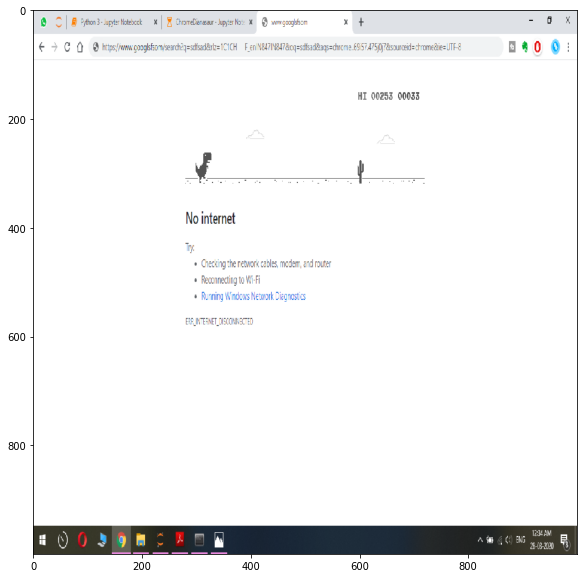

In [94]:
showImg(next(train_data_gen))